In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


Bad key "text.kerning_factor" on line 4 in
/Users/xinhui.li/.conda/envs/macaca/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [19]:
color_ind = [-5,7,1,3,5,9]
colormap = []
for i in color_ind:
    colormap.append(sns.color_palette("tab20")[i])

In [20]:
path = '/Users/xinhui.li/Documents/reproducibility/reproducibility/figure/4/PearsonCorr'

run_list = ['from_abcd_to_ccs', 'from_abcd_to_default', 'from_abcd_to_fmriprep',\
    'from_ccs_to_abcd', 'from_ccs_to_default', 'from_ccs_to_fmriprep',\
    'from_default_to_abcd', 'from_default_to_ccs', 'from_default_to_fmriprep',\
    'from_fmriprep_to_abcd', 'from_fmriprep_to_ccs', 'from_fmriprep_to_default'
    ]

var_list = ['anat_mask', 'anat_reg', 'func_mask', 'func_coreg', '']

corr_list = []
label_list = []
color_list = []

for run in run_list:
    corr = []
    label = []
    color = []
    
    for var_num, var in enumerate(var_list):
        if var != '':
            filepath = path+'/'+run+'-'+var+'.npy'
        else:
            filepath = path+'/'+run+'.npy'
        
        try:
            corr.append(np.load(filepath))
            if var != '':
                label.append(var.replace('_', ' '))
                color.append(colormap[var_num+2])
        except:
            corr.append([])
            label.append('')
            color.append(colormap[var_num+2])

    corr_list.append(corr)
    label_list.append(label)
    color_list.append(color)

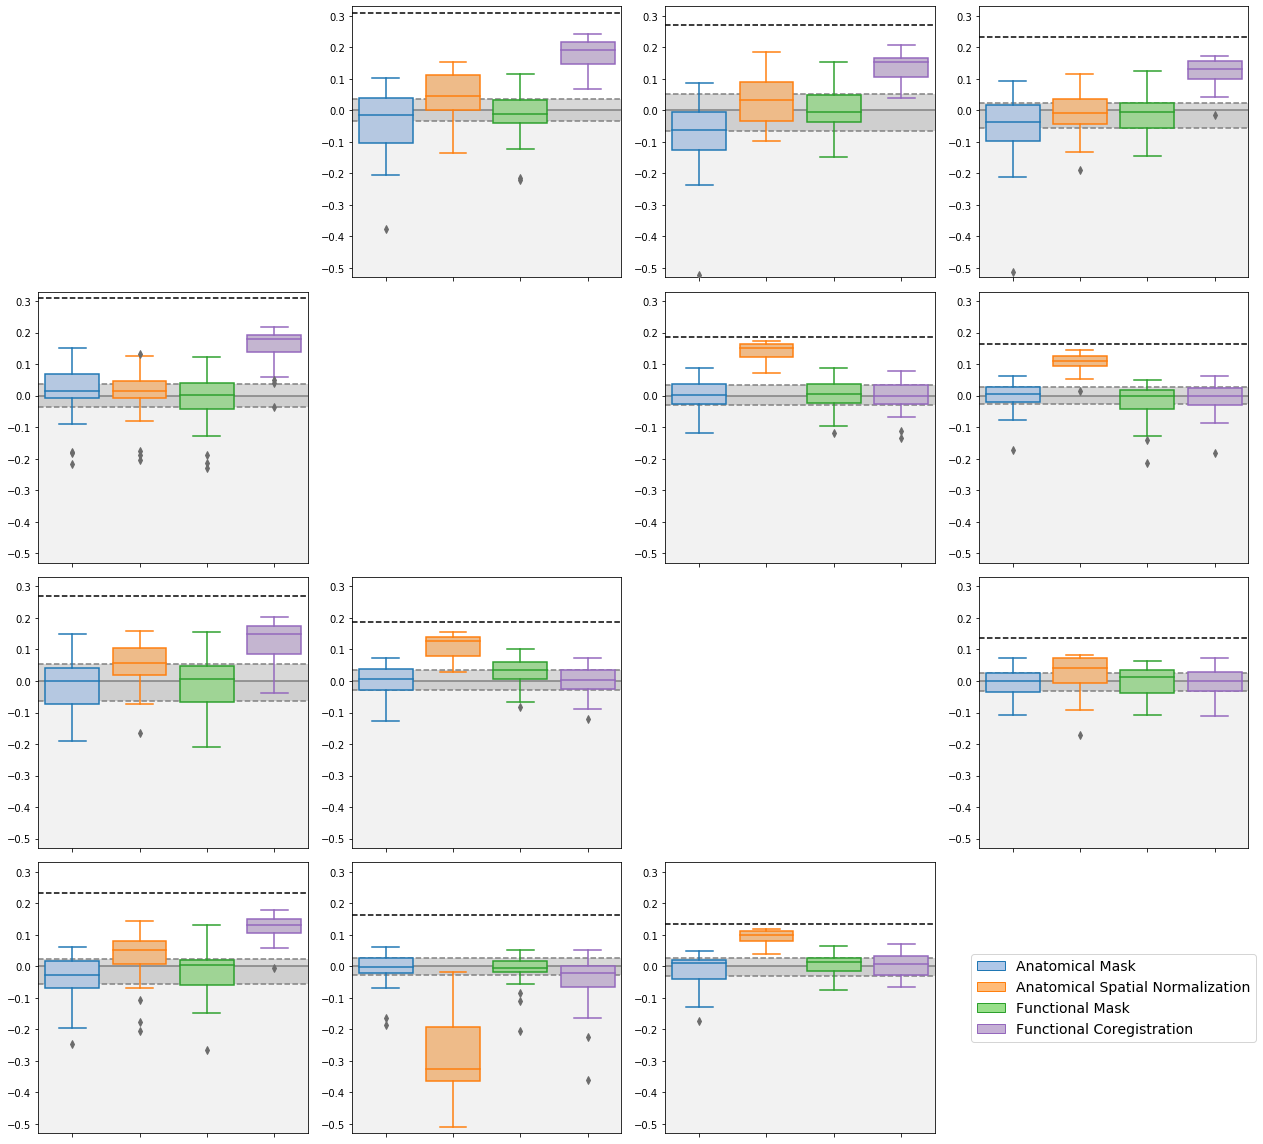

In [29]:
fig, axs = plt.subplots(4, 4, figsize=(18, 16))

for i in range(4):
    axs[i,i].axis('off')

pipeline_list = ['ABCD-BIDS', 'CCS', 'Default', 'fMRIPrep']
col_list = [[1,2,3], [0,2,3], [0,1,3], [0,1,2]]

for ind, run in enumerate(run_list):
    row = ind//3
    col_ind = ind%3
    col = col_list[row][col_ind]
    m = np.median(corr_list[ind][-1])
    p25 = np.percentile(corr_list[ind][-1], 25) - m
    p75 = np.percentile(corr_list[ind][-1], 75) - m
    d = []
    empty_var = []
    for i, j in enumerate(range(len(corr_list[ind])-1)):
        if len(corr_list[ind][j])>0:
            d.append(corr_list[ind][j] - m)
        else:
            d.append([])
            empty_var.append(i)
    darr = np.transpose(np.array(d))
    # print(row, col)
    ax = axs[row, col]
    # ax = sns.boxplot(data=darr, ax=axs[row, col], palette=color_list[ind])
    if len(empty_var) > 0:
        for ev in empty_var:
            ax.annotate('X', xy =(ev-0.2, -0.03), fontsize=30, color='gray')
    ax.axhspan(-0.9, 0, facecolor='gray', alpha=0.1, zorder=-3)
    ax.axhspan(p25, p75, facecolor='gray', alpha=0.3, zorder=-2)
    ax.axhline(y=1-m, linestyle='--', color='k', zorder=2) # color=sns.color_palette("tab20")[8]
    ax.axhline(y=p25, linestyle='--', color='gray', zorder=-1)
    ax.axhline(y=p75, linestyle='--', color='gray', zorder=-1)
    ax.axhline(y=0, color='gray', zorder=-1)

    axbox = sns.boxplot(data=darr, ax=ax, palette=color_list[ind], zorder=10)
    for i, box in enumerate(axbox.artists):
        box.set_edgecolor(sns.color_palette("tab20")[color_ind[i+2]-1])
        for j in range(6*i+4,6*(i+1)+4):
            axbox.lines[j].set_color(sns.color_palette("tab20")[color_ind[i+2]-1])
    
    # ax.set_title('From CPAC:'+str(pipeline_list[row])+' To CPAC:'+str(pipeline_list[col]), fontsize=14)
    # ax.set_xticklabels(label_list[ind], rotation=17, fontsize=14)
    ax.set_xticklabels('')
    ax.set_xlim([-0.5,3.5])
    # ax.set_ylim([-0.33,0.33])
    ax.set_ylim([-0.53,0.33])

# Add legend
ax = axs[3, 3]
legend_elements = [Patch(facecolor=sns.color_palette("tab20")[1], edgecolor=sns.color_palette("tab20")[0],
                         label='Anatomical Mask'),
                    Patch(facecolor=sns.color_palette("tab20")[3], edgecolor=sns.color_palette("tab20")[2],
                         label='Anatomical Registration'),
                    Patch(facecolor=sns.color_palette("tab20")[5], edgecolor=sns.color_palette("tab20")[4],
                         label='Functional Mask'),
                    Patch(facecolor=sns.color_palette("tab20")[9], edgecolor=sns.color_palette("tab20")[8],
                         label='Functional Coregistration')]
ax.legend(handles=legend_elements, loc='center', fontsize=16)
plt.tight_layout()
plt.savefig('Figure4.png', dpi=600)